<a href="https://colab.research.google.com/github/venkatanadikatla/pytorch/blob/main/Manual_Graded_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This is a Python code cell
!apt-get install r-base


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
r-base is already the newest version (4.4.2-1.2204.0).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:

install.packages("ggplot2")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



**Question1**: **Create three histograms similar to the ones in Section 2 of Module 5, Lesson 1, for the autocorrelation at lag 3 of the ARMA(2, 1) process Xt = 0.2Xt−1 + 0.08Xt−2 + Wt + .7Wt−1. Use 10000 simulations
and time series of length 100, 1000, and 10000. Use the same breakpoints and the same range on the horizontal
and vertical axes for each plot, so that it is easier to compare the three plots. Discuss the meaning of the plots
in a paragraph of three to five substantive sentences. Your histograms are worth a total of 22 points (graded for
both neatness and accuracy), and your discussion is worth 13 points. Include the code you use to generate your
histograms in your submission.**

**Note: Part of the assignment is for you to figure out independently how to use the histogram feature in R. The
relevant function is hist, and you’ll want to familiarize yourself with how the breaks option works. (Execute
?hist to pull up documentation.) Also, a couple of hints on some simple graphics options: Use par(mfrow =
c(1,3)) to get a 1 × 3 grid in which you can place all three histograms. Your figure will come out nicer if you
adjust the default width and height before you export or copy your image to clipboard.)**

**Answer:**


**Step-01 Initilization of Variables:** Initializing lag3_acf_100, lag3_acf_1000, and lag3_acf_10000 as numeric vectors of length n_sims = 10000. This ensures each vector will store 10,000 results.

**Step-02 Defining the Simulation Function:** This function generates a time series of length n using an ARMA(2,1) model.
* arima.sim simulates the ARMA process with parameters: Xt = 0.2Xt−1 + 0.08Xt−2 + Wt + .7Wt−1.
* acf(..., plot=FALSE) computes the autocorrelation function without plotting it.
* $acf[4] extracts the lag-3 autocorrelation value.  

**Step-03 Manual Lag-3 Autocorrelation:** The ARMA formula for autocorrelation becomes:
$$
\rho_h = \phi_1 \rho_{h-1} + \phi_2 \rho_{h-2}
$$

where
ϕ1=0.2 and ϕ2=0.08 and the initial conditions are:
$$
\rho_0 = 1, \quad \rho_1 = \frac{\phi_1 + \phi_1 \phi_2}{1 - \phi_2}.
$$

**Step a: Initial Values**
$$
\rho_1 = \frac{0.2 + 0.2 \cdot 0.08}{1 - 0.08} = \frac{0.2 + 0.016}{0.92} = \frac{0.216}{0.92} = 0.21739
$$

**Step b: For \( h = 2 \)**
$$
\rho_2 = \phi_1 \rho_1 + \phi_2 \rho_0
$$
$$
\rho_2 = 0.2 \cdot 0.21739 + 0.08 \cdot 1 = 0.043478 + 0.08 = 0.12348
$$

**Step c: For \( h = 3 \)**

$$
\rho_3 = \phi_1 \rho_2 + \phi_2 \rho_1
$$
$$
\rho_3 = 0.2 \cdot 0.12348 + 0.08 \cdot 0.21739 = 0.024696 + 0.017391 = 0.09026
$$

**Final Results**
$$\rho_3 =0.09026$$


**Step-03 Theoretical autocorrelation at lag 3:**
* ARMAacf calculates theoretical autocorrelation values for the specified ARMA(2,1) model up to lag 3.
* $[4] extracts the lag-3 autocorrelation value.


**Step-04 Determining Histogram Breaks:**

* Combines the three vectors lag3_acf_100, lag3_acf_1000, and lag3_acf_10000 into a single vector. This includes all 30,000 values of lag-3 autocorrelation estimates from the simulations.

* ylim values (6000) and matches it to the data, avoiding truncation or overflow.
* Computes the range dynamically based on all datasets, ensuring all data is captured in each histogram.
* Consistency: Ensures that all three histograms (for n=100,1000,10000) use the same bin edges, making it easier to compare distributions.
* Define breakpoints (breaks) that divide the range of values (e.g., -0.6 to 0.7) into equal intervals (width = 0.02).

[1] "Theoretical lag-3 autocorrelation: 0.0902563605524594"
[1] -0.6  0.7


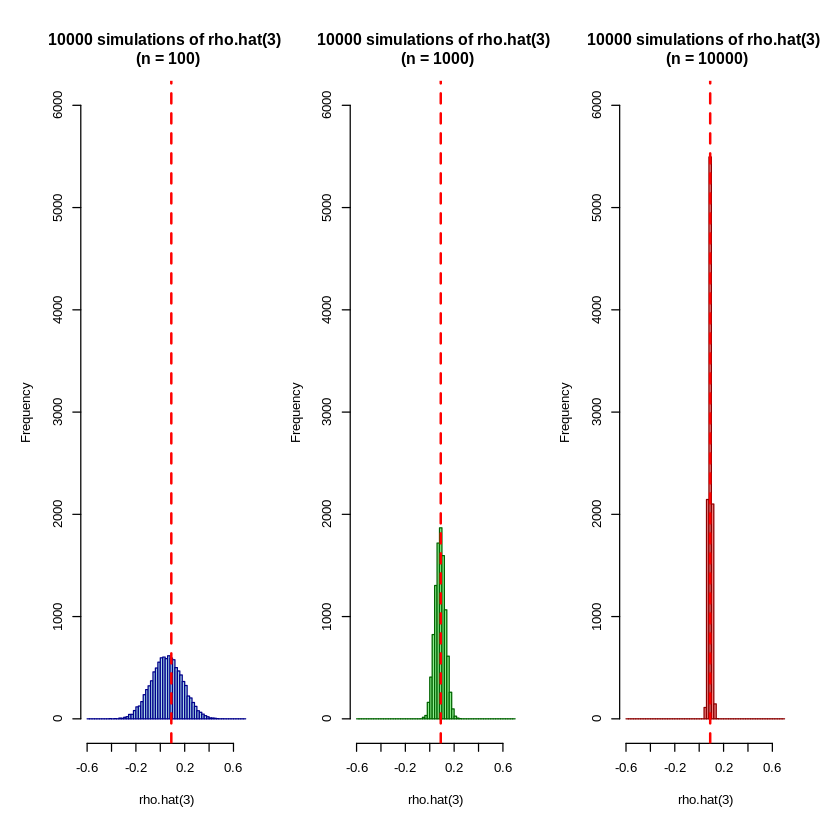

In [37]:
# Set up the parameters
# Step-01 Initilization of Variables
set.seed(1)
n_sims <- 10000
lag3_acf_100 <- numeric(n_sims)
lag3_acf_1000 <- numeric(n_sims)
lag3_acf_10000 <- numeric(n_sims)

#Step-02 Defining the Simulation Function:
# Simulation function to get lag-3 autocorrelation
simulate_acf <- function(n) {
  acf(arima.sim(model = list(ar = c(0.2, 0.08), ma = 0.7), n = n), plot = FALSE)$acf[4]
}

# Run simulations for different time series lengths
for (i in 1:n_sims) {
  lag3_acf_100[i] <- simulate_acf(100)
  lag3_acf_1000[i] <- simulate_acf(1000)
  lag3_acf_10000[i] <- simulate_acf(10000)
}
#Step-03 Manual Lag-3 Autocorrelation:
# Step-03 Theoretical autocorrelation at lag 3
theoretical_lag3 <- ARMAacf(ar = c(0.2, 0.08), ma = 0.7, lag.max = 3)[4]
print(paste("Theoretical lag-3 autocorrelation:", theoretical_lag3))

#Step-04 Determining Histogram Breaks:
# Determine the range of all data
range_all <- range(c(lag3_acf_100, lag3_acf_1000, lag3_acf_10000))

# Expand the range slightly to ensure all data is captured
breaks <- seq(floor(range_all[1] * 10) / 10 - 0.1, ceiling(range_all[2] * 10) / 10 + 0.1,
 by = 0.02)

# Check the updated range of breaks
print(range(breaks))  # This should fully encompass the range of all datasets


# Set up the plot layout
par(mfrow = c(1, 3), mar = c(5, 4, 4, 2) + 0.1, oma = c(1, 1, 1, 1))

# Histogram for n = 100
hist(lag3_acf_100, breaks = breaks,
     main = "10000 simulations of rho.hat(3) \n (n = 100)",
     xlim = range(breaks), ylim = c(0, 6000), xlab = "rho.hat(3)", ylab = "Frequency",
     col = "lightblue", border = "darkblue")
abline(v = theoretical_lag3, col = "red", lwd = 2, lty = 2)
# Add vertical line at mean lag-3 ACF

# Histogram for n = 1000
hist(lag3_acf_1000, breaks = breaks,
     main = "10000 simulations of rho.hat(3) \n (n = 1000)",
     xlim = range(breaks), ylim = c(0, 6000), xlab = "rho.hat(3)", ylab = "Frequency",
     col = "lightgreen", border = "darkgreen")
abline(v = theoretical_lag3, col = "red", lwd = 2, lty = 2)
# Add vertical line at mean lag-3 ACF

# Histogram for n = 10000
hist(lag3_acf_10000, breaks = breaks,
     main = "10000 simulations of rho.hat(3) \n (n = 10000)",
     xlim = range(breaks), ylim = c(0, 6000), xlab = "rho.hat(3)", ylab = "Frequency",
     col = "lightcoral", border = "darkred")
abline(v = theoretical_lag3, col = "red", lwd = 2, lty = 2)
# Add vertical line at mean lag-3 ACF

# Restore plotting parameters
par(mfrow = c(1, 1))


**Interpretation of the Histograms**

* As the sample size increases (100 → 1000 → 10000), the histogram becomes narrower and more concentrated around the theoretical lag-3 autocorrelation value (0.0903).

* Variance: The spread of the histograms decreases significantly as sample size increases, showing improved precision of the estimated autocorrelation values.
Bias:

* Across all sample sizes, the mean of the simulated lag-3 autocorrelations aligns closely with the theoretical value (0.0903), indicating unbiased estimation.

* You can notice that as we take a longer and longer time series, the distribution gets sort of more concentrated around the theortical value of 0.0903 which is plotted as red dotted line.
* **Practical Implication:**
  * **For smaller time series** (e.g., n=
100), estimates of autocorrelation are highly variable, making inferences less reliable.
  * **Larger time series** (e.g., n=10,000) provide more precise estimates, suitable for robust statistical analysis.

**Question 2: (40 points) Consider the AR(2) process Xt = 0.7Xt−1 − 0.6Xt−2 + Wt
, with white noise variance 1.
• (4 points) Simulate 100 timesteps of the process after executing set.seed(4) (for reproducibility).
Record the first few values of the sample ACF, as well as the sample ACVF at lag zero.
• (11 points) Using the sample ACF/sample ACVF, compute the Yule–Walker estimators for the process.
• (7 points) Compute the maximum likelihood estimators using sarima, making sure to set no.constant
= TRUE. How close (relative to the standard error generated by sarima) are the Yule–Walker and maximum likelihood estimators to each other?
• (9 points) Generate and discuss the model diagnostics for your fit. (Include in your submission the plot
output of the sarima call.) Is there anything surprising here? Do the issues go away if you run your
simulation for more timesteps, or if you choose a different seed?
• (9 points) Record the AIC and AICc for the AR(2) fit, as well as for an AR(1) and AR(3) fit. Indicate how
you’re obtaining these values (console output of the sarima call, stored value of the sarima call, or
something else). Which model do the AIC and AICc choose?**

**Part-01:   (4 points) Simulate 100 timesteps of the process after executing set.seed(4) (for reproducibility). Record the first few values of the sample ACF, as well as the sample ACVF at lag zero.**


**Manual Calculation Explanation before the code:**

**Sample ACVF (Autocovariance Function)**

**The sample autocovariance at lag \( h\) is given by:**

$$
\hat{\gamma}(h) = \frac{1}{n} \sum_{t=1}^{n-|h|} (X_t - \bar{X})(X_{t+h} - \bar{X})
$$

Where:
- \( X_t \) is the observed value at time \( t \),
- \( \bar{X} \) is the sample mean of the time series,
- \( h \) is the lag (e.g., lag 0, lag 1, etc.),
- \( n \) is the total number of observations.

**The calculation of the mean is explicitly shown as:**
$$
\bar{X} = \frac{1}{n} \sum_{t=1}^{n} X_t
$$


**Sample ACF (Autocorrelation Function)**

The sample autocorrelation at lag \( h\) is the normalized autocovariance:

$$
\hat{\rho}(h) = \frac{\gamma_h}{\gamma_0}
$$

This scales the autocovariance by the variance at lag 0, ensuring that:

$$
-1 \leq \hat{\rho}(h)\leq 1
$$

**The code below shows the part-01 results:**

In [11]:
#Part-01:
set.seed(4)
ar_process <- arima.sim(model = list(ar = c(0.7, -0.6)), n = 100, sd = sqrt(1))
# Standard deviation is the square root of the variance, which is 1

acf_values <- acf(ar_process, type = "correlation", plot = FALSE)
acvf_at_lag0 <- acf(ar_process, type = "covariance", plot = FALSE)

cat('Sample ACF for first few ACF values:',acf_values$acf[1:5],"\n" )

cat('Sample ACVF for lag zero:', acvf_at_lag0$acf[1], "\n")



Sample ACF for first few ACF values: 1 0.416364 -0.3480183 -0.5785837 -0.1515576 
Sample ACVF for lag zero: 1.722747 


**Part-02:(11 points) Using the sample ACF/sample ACVF, compute the Yule–Walker estimators for the process.**


**Manual Calculation Explanation before the code:**

**Solve the Yule-Walker Equations**

The Yule-Walker equations for an AR(2) process are:

$$
\phi_1 \cdot \hat{\gamma}(0) + \phi_2 \cdot \hat{\gamma}(1) = \hat{\gamma}(1),
$$

$$
\phi_1 \cdot \hat{\gamma}(1) + \phi_2 \cdot \hat{\gamma}(0) = \hat{\gamma}(2).
$$

These can be written in matrix form as:

$$
\mathbf{A} \cdot \boldsymbol{\phi} = \mathbf{b},
$$

where:

$$
\mathbf{A} =
\begin{bmatrix}
\hat{\gamma}(0) & \hat{\gamma}(1) \\
\hat{\gamma}(1) & \hat{\gamma}(0)
\end{bmatrix}, \quad
\boldsymbol{\phi} =
\begin{bmatrix}
\phi_1 \\
\phi_2
\end{bmatrix}, \quad
\mathbf{b} =
\begin{bmatrix}
\hat{\gamma}(1) \\
\hat{\gamma}(2)
\end{bmatrix}.
$$




**The white noise variance \( \sigma^2 \) is calculated as:**

$$
\sigma^2 = \hat{\gamma}(0) - \sum_{i=1}^h \phi_i \cdot \hat{\gamma}(i)
$$

For an AR(2) process (\( h = 2 \)):

$$
\sigma^2 = \hat{\gamma}(0) - \left( \phi_1 \cdot \hat{\gamma}(1) + \phi_2 \cdot \hat{\gamma}(2) \right)
$$


**The code below shows the part-02 results:**

In [40]:
#Part-02:
# Solve the Yule-Walker equations
A <- matrix(c(gamma.hat[1], gamma.hat[2], gamma.hat[2], gamma.hat[1]), 2, 2)
b <- c(gamma.hat[2], gamma.hat[3])
phi.hat <- solve(A, b)  # Yule-Walker estimators
cat("Yule-Walker estimators (phi1, phi2):", phi.hat, "\n")

# Compute Yule-Walker estimator for white noise variance
sigma.sq <- gamma.hat[1] - sum(phi.hat * gamma.hat[-1])
cat("White noise variance (Yule-Walker):", sigma.sq, "\n")

Yule-Walker estimators (phi1, phi2): 0.6789722 -0.6307179 
White noise variance (Yule-Walker): 0.8575819 


**Part-03: (7 points) Compute the maximum likelihood estimators using sarima, making sure to set no.constant = TRUE. How close (relative to the standard error generated by sarima) are the Yule–Walker and maximum likelihood estimators to each other?**

In [1]:

install.packages('astsa')
library(astsa)
install.packages('forecast')
library(forecast)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘forecast’


The following object is masked from ‘package:astsa’:

    gas





**Part-03: Response**

The focus is on the closeness of the point estimates (Yule–Walker vs. MLE) relative to the MLE standard errors.

**Manual Calculation Formulas**
To assess how close the Yule–Walker and MLE estimators are, we proceed as follows:

* **Maximum Likelihood Estimators (MLE):**
The MLE estimators (ϕMLE) for the AR coefficients (ϕ1,ϕ2) are obtained from the fitted AR(2) model. The standard errors (ϕse) of these estimates are derived from the variance-covariance matrix of the fitted model:

* **Yule–Walker Estimators (ϕYW):**

These are obtained from the solution of the Yule–Walker equations. Provided in part-02 response.

* **Relative Difference:**
The standard error (phise) represents the uncertainty or variability in the MLE estimates. By dividing the difference between the two estimators (phi.hat[yule-walker] and phi.mle [MLE]) by the standard error of the MLE estimates, you standardize the difference.

**Mathematically:**

$$
\text{Relative Difference} = \frac{\phi_{\text{YW}} - \phi_{\text{MLE}}}{\phi_{\text{se}}}
$$


This gives the difference in terms of how many standard errors away the Yule–Walker estimator is from the MLE estimator.

**The code below shows the part-03 results:**


initial  value 0.274042 
iter   2 value -0.001054
iter   3 value -0.076077
iter   4 value -0.080720
iter   5 value -0.081457
iter   6 value -0.082074
iter   7 value -0.082104
iter   8 value -0.082106
iter   9 value -0.082113
iter  10 value -0.082113
iter  11 value -0.082113
iter  11 value -0.082113
final  value -0.082113 
converged
initial  value -0.078038 
iter   2 value -0.078042
iter   3 value -0.078043
iter   4 value -0.078043
iter   4 value -0.078043
iter   4 value -0.078043
final  value -0.078043 
converged
<><><><><><><><><><><><><><>
 
Coefficients: 
    Estimate     SE t.value p.value
ar1   0.6762 0.0768  8.8009       0
ar2  -0.6340 0.0766 -8.2791       0

sigma^2 estimated as 0.8451468 on 98 degrees of freedom 
 
AIC = 2.741791  AICc = 2.743028  BIC = 2.819946 
 
MLE estimators (phi1, phi2): 0.676183 -0.6339629 
Standard errors (phi1, phi2): 0.07683099 0.07657398 
Difference (relative to SE): 0.03630322 0.04237703 


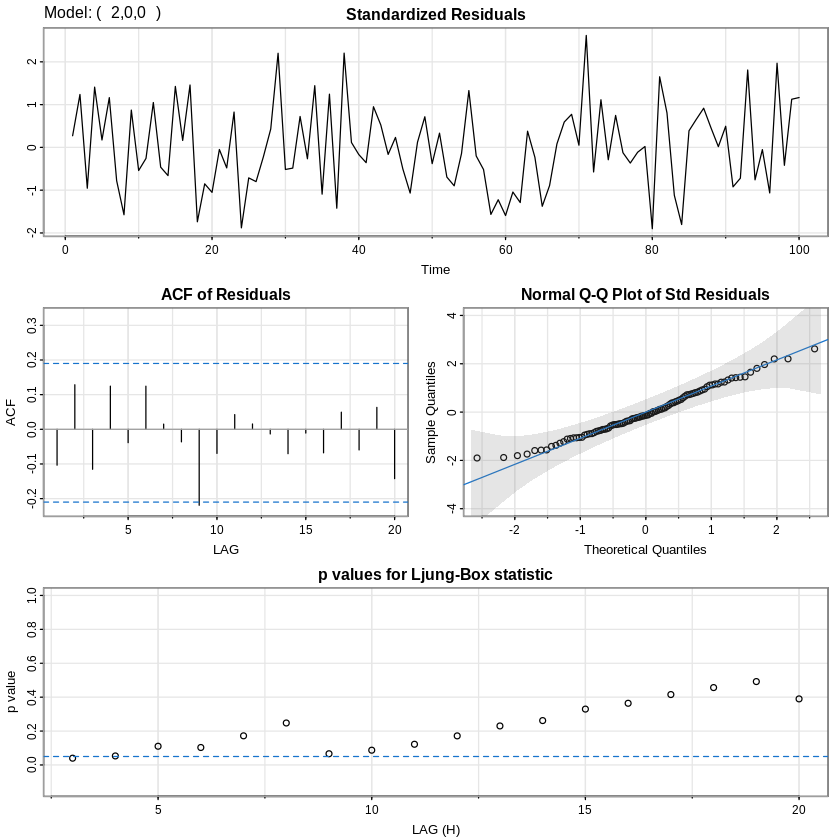

In [45]:
library(astsa)
sarima_fit <- sarima(ar_process, 2, 0, 0, no.constant = TRUE)
phi_mle <- sarima_fit$fit$coef[1:2]
phi_se <- sqrt(diag(sarima_fit$fit$var.coef))
cat("MLE estimators (phi1, phi2):", phi_mle, "\n")
cat("Standard errors (phi1, phi2):", phi_se, "\n")

# Compare Yule-Walker and MLE estimators relative to SE
cat("Difference (relative to SE):", (phi.hat - phi_mle) / phi_se, "\n")


**Interpretation of Results (Part-03):**
A relative difference close to 0 means the Yule–Walker and MLE estimates are very close, relative to the variability of the MLE estimates.
* For instance the relative differences here in part-03 are: **0.03630322 0.04237703**

**These values indicate that the Yule–Walker estimators for ϕ1 and ϕ2  are very close to the MLE estimators, within a fraction of their respective standard errors.**

**Part-04: (9 points) Generate and discuss the model diagnostics for your fit. (Include in your submission the plot output of the sarima call.) Is there anything surprising here? Do the issues go away if you run your simulation for more timesteps, or if you choose a different seed?**

initial  value 0.274042 
iter   2 value -0.001054
iter   3 value -0.076077
iter   4 value -0.080720
iter   5 value -0.081457
iter   6 value -0.082074
iter   7 value -0.082104
iter   8 value -0.082106
iter   9 value -0.082113
iter  10 value -0.082113
iter  11 value -0.082113
iter  11 value -0.082113
final  value -0.082113 
converged
initial  value -0.078038 
iter   2 value -0.078042
iter   3 value -0.078043
iter   4 value -0.078043
iter   4 value -0.078043
iter   4 value -0.078043
final  value -0.078043 
converged
<><><><><><><><><><><><><><>
 
Coefficients: 
    Estimate     SE t.value p.value
ar1   0.6762 0.0768  8.8009       0
ar2  -0.6340 0.0766 -8.2791       0

sigma^2 estimated as 0.8451468 on 98 degrees of freedom 
 
AIC = 2.741791  AICc = 2.743028  BIC = 2.819946 
 


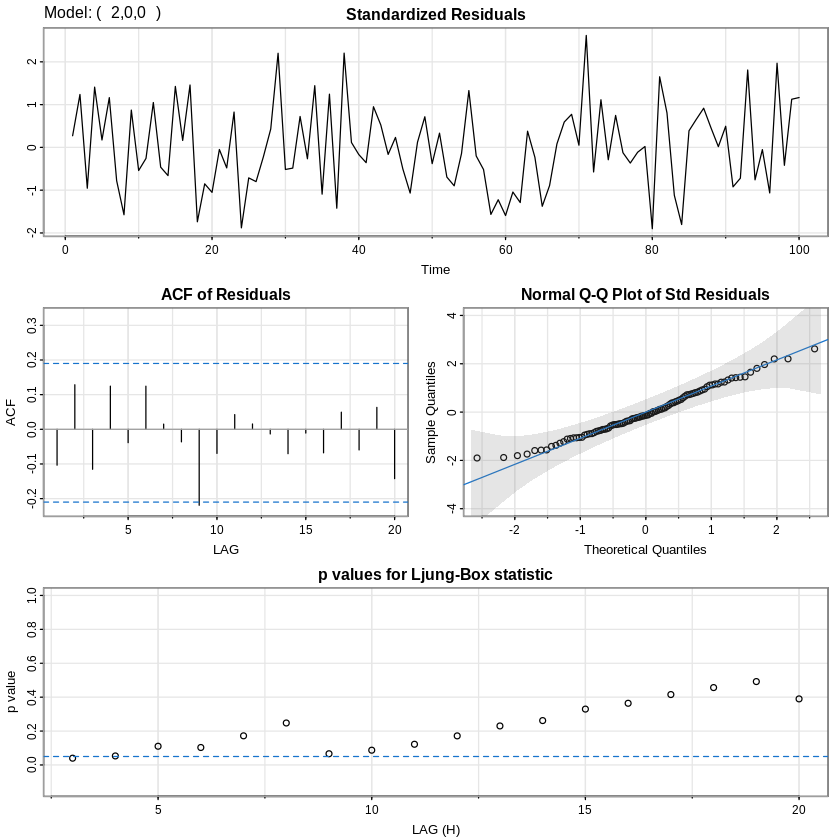

In [48]:
# Part-04: Started with same Sarima model used in part-03 response
sarima(ar_process, 2, 0, 0, no.constant = TRUE)

**Continution to Part-04**
**Will set the up the seed to 4 and n=1000**

initial  value 0.300065 
iter   2 value 0.047120
iter   3 value -0.023795
iter   4 value -0.030423
iter   5 value -0.031271
iter   6 value -0.031595
iter   7 value -0.031607
iter   8 value -0.031624
iter   9 value -0.031627
iter  10 value -0.031627
iter  11 value -0.031627
iter  11 value -0.031627
final  value -0.031627 
converged
initial  value -0.031309 
iter   2 value -0.031309
iter   3 value -0.031309
iter   4 value -0.031309
iter   4 value -0.031309
iter   4 value -0.031309
final  value -0.031309 
converged
<><><><><><><><><><><><><><>
 
Coefficients: 
    Estimate     SE  t.value p.value
ar1   0.6847 0.0251  27.3127       0
ar2  -0.6086 0.0251 -24.2596       0

sigma^2 estimated as 0.9382457 on 998 degrees of freedom 
 
AIC = 2.781259  AICc = 2.781271  BIC = 2.795982 
 


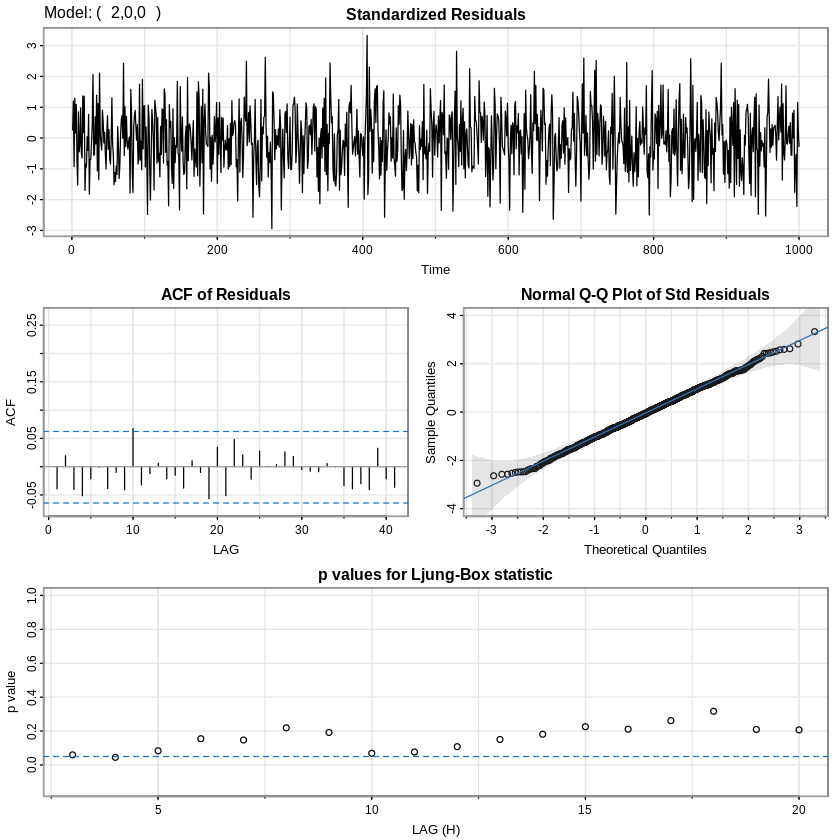

In [49]:
set.seed(4)
ar_process_long <-arima.sim(model = list(ar=c(0.7, -0.6)), n=1000)
sarima(ar_process_long, 2,0,0, no.constant=TRUE)

**Part-04 Key Observations (from 100 and 1000 with set.seed(4)):**

* **Estimate Stability:**
For the short series (100 timesteps), the AR coefficients (**ϕ1=0.6762, ϕ2=−0.6340**) deviate slightly from the true values (**ϕ1=0.7, ϕ2=−0.6**).
For the long series (1000 timesteps), the AR coefficients (**ϕ1=0.6847, ϕ2=−0.6086**
) are closer to the true values, suggesting better estimate accuracy as the sample size increases.

* **Standard Errors:**
The standard errors for the AR coefficients are much smaller in the long series (**0.0251**) compared to the short series (**0.0768**). This reflects increased precision in parameter estimation with more data.

* **White Noise Variance (σ2):**
The estimated σ2 values are comparable (**0.8451 vs. 0.9382**), but both models reasonably capture the white noise variance near the true value of σ2=1. However, 1000 time steps is more accurate.

* **AIC/AICc:**
The AIC and AICc values are slightly lower for the short series model, but this is primarily due to the smaller sample size penalty. These criteria are not directly comparable across datasets of different sizes.


**Continution to Part-04**
**Will set the up the seed to 4 and n=10000**

initial  value 0.331048 
iter   2 value 0.082709
iter   3 value 0.003014
iter   4 value -0.002505
iter   5 value -0.002919
iter   6 value -0.002939
iter   7 value -0.002949
iter   8 value -0.002954
iter   9 value -0.002954
iter  10 value -0.002954
iter  10 value -0.002954
iter  10 value -0.002954
final  value -0.002954 
converged
initial  value -0.002927 
iter   2 value -0.002927
iter   3 value -0.002927
iter   4 value -0.002927
iter   4 value -0.002927
iter   4 value -0.002927
final  value -0.002927 
converged
<><><><><><><><><><><><><><>
 
Coefficients: 
    Estimate    SE  t.value p.value
ar1   0.7101 0.008  88.9035       0
ar2  -0.6015 0.008 -75.2532       0

sigma^2 estimated as 0.9940529 on 9998 degrees of freedom 
 
AIC = 2.832624  AICc = 2.832624  BIC = 2.834787 
 


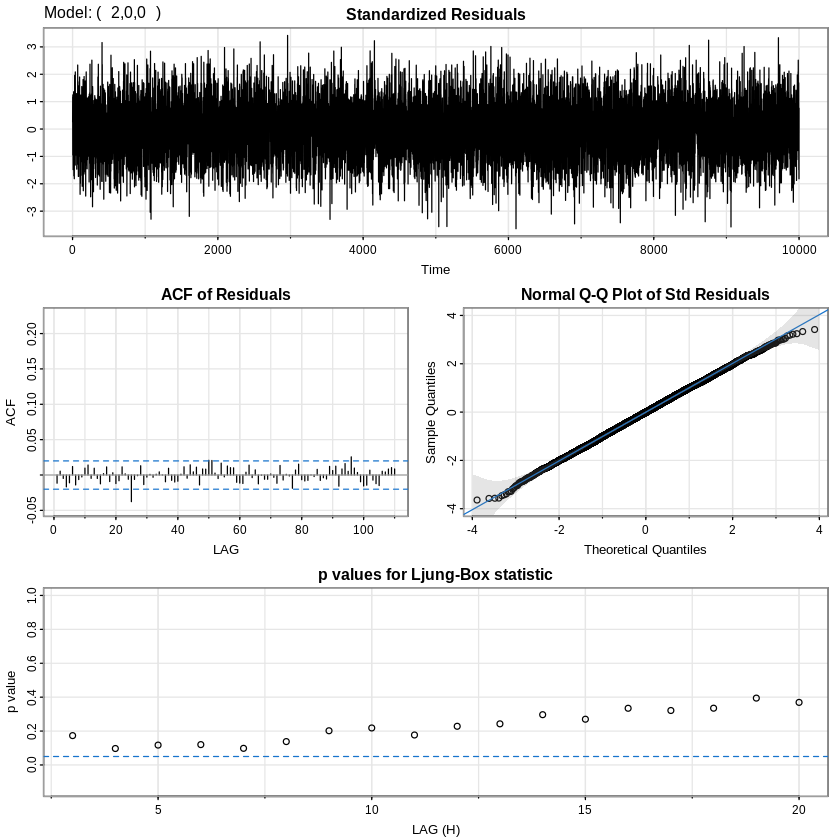

In [50]:
set.seed(4)
ar_process_long <-arima.sim(model = list(ar=c(0.7, -0.6)), n=10000)
sarima(ar_process_long, 2,0,0, no.constant=TRUE)

**Part-04 Key Observations (from 100, 1000 with set.seed(4) and 10000):**

* **Estimate Stability:**
For the short series (100 timesteps), the AR coefficients (**ϕ1=0.6762, ϕ2=−0.6340**) deviate slightly from the true values (**ϕ1=0.7, ϕ2=−0.6**).
For the long series (1000 timesteps), the AR coefficients (**ϕ1=0.6847, ϕ2=−0.6086**) are closer to the true values. For the long series (10000 timesteps), the AR coefficients (**ϕ1=0.0.7101, ϕ2=−0.6015**) are much much closer to the true values, suggesting better estimate accuracy as the sample size increases.

* **Standard Errors:**
The standard errors for the AR coefficients are much smaller in the 10000 time steps series (**0.008**) compared to 1000 time steps (**0.0251**) and the short series (**0.0768**). This reflects increased precision in parameter estimation with more data.

* **White Noise Variance (σ2):**
The estimated σ2 values are comparable (**0.8451 vs. 0.9382 vs 0.9940529**), but both models reasonably capture the white noise variance near the true value of σ2=1. However, 10000 time steps is more accurate.

* **AIC/AICc:**
The AIC and AICc values are  lower for the short series model, but this is primarily due to the smaller sample size penalty. These criteria are not directly comparable across datasets of different sizes.


**Part-04 Final Observations:**

**Computational Efficiency**

* **100 Timesteps:** Computationally very light but sacrifices accuracy and precision.
* **1000 Timesteps:** Strikes a balance between computational efficiency and performance.
* **10,000 Timesteps:** Provides the most accurate and precise estimates but is computationally heavy, especially for real-time or large-scale applications.

**Which Model Performed Better?**
* **Best Performance:** The 10,000-timestep model provides the most accurate and precise estimates, with coefficients closest to the true values and the smallest standard errors.
* **Practical Performance:** The 1000-timestep model strikes a balance between accuracy and computational efficiency, making it suitable for most practical applications.

**Recommendation:**

* **For Precision and Best Results:** Use the 10,000-timestep model if computational resources and time are not a constraint.
* **For Practical Applications:** Use the 1000-timestep model for a good trade-off between computational efficiency and performance.
* **Avoid Using the 100-Timestep Model:** While computationally light, it lacks the precision and reliability needed for accurate modeling.


**Conclusion:** The 1000 time step model is the best option for practical applications, while the 10000 timestep model is the gold standard for achieving maximum precision in parameter estimation.

**Part-05 (9 points) Record the AIC and AICc for the AR(2) fit, as well as for an AR(1) and AR(3) fit. Indicate how you’re obtaining these values (console output of the sarima call, stored value of the sarima call, or something else). Which model do the AIC and AICc choose?**

**Part-05 Manual Formuals (Answer):**


**The AIC is calculated using the formula:**

$$
\text{AIC}(\beta) = -2 \cdot \log \left( L \left( \beta, \frac{1}{n} S(\beta) \right) \right) + 2 (p + q + 1)
$$

Where:
- \( p + q + 1 \): Accounts for AR, MA, and variance parameters without the mean.

**The AICc is calculated using the formula:**
$$
\text{AICc}(\beta) = -2 \cdot \log \left( L \left( \beta, \frac{1}{n} S(\beta) \right) \right) + 2 (p + q + 1) \cdot \frac{n}{n - p - q - 2}
$$

* where:p + q + 1: Includes AR, MA, variance parameters.
* n − p − q − 2: Adjusts for the number of effective observations.

**Relative Scaling:**

To normalize the AIC and AICc for comparison, divide by \( n \):

$$
\text{Scaled AIC} = \frac{\text{AIC}}{n}, \quad \text{Scaled AICc} = \frac{\text{AICc}}{n}
$$

This provides a relative measure of model performance per observation.



In [57]:
#Part-05:
sarima_fit_ar1 <- sarima(ar_process, 1, 0, 0, no.constant = TRUE, details = FALSE)
sarima_fit_ar2 <- sarima(ar_process, 2, 0, 0, no.constant = TRUE, details = FALSE)
sarima_fit_ar3 <- sarima(ar_process, 3, 0, 0, no.constant = TRUE, details = FALSE)

# Extract AIC values directly
aic_ar1 <- sarima_fit_ar1$fit$aic
aic_ar2 <- sarima_fit_ar2$fit$aic
aic_ar3 <- sarima_fit_ar3$fit$aic

# Use Formula 1 for AICc calculations
n <- 100  # Number of observations
aicc_ar1 <- -2 * sarima_fit_ar1$fit$loglik + 2 * (1 + 1) * n / (n - 1 - 2)  # p = 1
aicc_ar2 <- -2 * sarima_fit_ar2$fit$loglik + 2 * (2 + 1) * n / (n - 2 - 2)  # p = 2
aicc_ar3 <- -2 * sarima_fit_ar3$fit$loglik + 2 * (3 + 1) * n / (n - 3 - 2)  # p = 3

# Scale the AIC and AICc values
scaled_aic_ar1 <- aic_ar1 / n
scaled_aic_ar2 <- aic_ar2 / n
scaled_aic_ar3 <- aic_ar3 / n

scaled_aicc_ar1 <- aicc_ar1 / n
scaled_aicc_ar2 <- aicc_ar2 / n
scaled_aicc_ar3 <- aicc_ar3 / n

# Print results
cat("AIC (AR1, AR2, AR3):", scaled_aic_ar1, scaled_aic_ar2, scaled_aic_ar3, "\n")
cat("AICc (AR1, AR2, AR3):", scaled_aicc_ar1, scaled_aicc_ar2, scaled_aicc_ar3, "\n")


<><><><><><><><><><><><><><>
 
Coefficients: 
    Estimate     SE t.value p.value
ar1   0.4158 0.0906  4.5916       0

sigma^2 estimated as 1.421564 on 99 degrees of freedom 
 
AIC = 3.231533  AICc = 3.231941  BIC = 3.283636 
 
<><><><><><><><><><><><><><>
 
Coefficients: 
    Estimate     SE t.value p.value
ar1   0.6762 0.0768  8.8009       0
ar2  -0.6340 0.0766 -8.2791       0

sigma^2 estimated as 0.8451468 on 98 degrees of freedom 
 
AIC = 2.741791  AICc = 2.743028  BIC = 2.819946 
 
<><><><><><><><><><><><><><>
 
Coefficients: 
    Estimate     SE t.value p.value
ar1   0.5661 0.0994  5.6949  0.0000
ar2  -0.5185 0.1014 -5.1138  0.0000
ar3  -0.1705 0.0998 -1.7082  0.0908

sigma^2 estimated as 0.8205279 on 97 degrees of freedom 
 
AIC = 2.733077  AICc = 2.735577  BIC = 2.837284 
 
AIC (AR1, AR2, AR3): 3.231533 2.741791 2.733077 
AICc (AR1, AR2, AR3): 3.23277 2.744291 2.737288 


In [54]:
best_model <- auto.arima(ar_process, trace = TRUE, stationary = TRUE,seasonal = FALSE)



 ARIMA(2,0,2) with non-zero mean : 277.0283
 ARIMA(0,0,0) with non-zero mean : 342.3034
 ARIMA(1,0,0) with non-zero mean : 325.3978
 ARIMA(0,0,1) with non-zero mean : 307.3101
 ARIMA(0,0,0) with zero mean     : 340.2216
 ARIMA(1,0,2) with non-zero mean : Inf
 ARIMA(2,0,1) with non-zero mean : 276.7903
 ARIMA(1,0,1) with non-zero mean : 308.1064
 ARIMA(2,0,0) with non-zero mean : 276.5737
 ARIMA(3,0,0) with non-zero mean : 275.8924
 ARIMA(4,0,0) with non-zero mean : 276.7191
 ARIMA(3,0,1) with non-zero mean : 276.1235
 ARIMA(4,0,1) with non-zero mean : 278.3158
 ARIMA(3,0,0) with zero mean     : 273.7288
 ARIMA(2,0,0) with zero mean     : 274.4291
 ARIMA(4,0,0) with zero mean     : 274.4767
 ARIMA(3,0,1) with zero mean     : 273.8895
 ARIMA(2,0,1) with zero mean     : 274.624
 ARIMA(4,0,1) with zero mean     : 276.0062

 Best model: ARIMA(3,0,0) with zero mean     



**Final Observations:** **AIC and AICc Values:**

Based on the outputs of above sarima fits and AIC/AICc computations:

$$
\text{AIC Values:}
$$

$$
\text{AR(1): } \text{AIC} = 3.231533
$$

$$
\text{AR(2): } \text{AIC} = 2.741791
$$

$$
\text{AR(3): } \text{AIC} = 2.733077
$$

$$
\text{AICc Values:}
$$

$$
\text{AR(1): } \text{AICc} = 3.232770
$$

$$
\text{AR(2): } \text{AICc} = 2.744291
$$

$$
\text{AR(3): } \text{AICc} = 2.735577
$$

**Which Model Do AIC and AICc Choose?**
Both AIC and AICc select the AR(3) model as the best fit because it has the lowest value:

* **AIC (AR(3)) = 2.733077**
* **AICc (AR(3)) = 2.735577**

**Alternative Auto-Arima Analysis**
I've also used auto.arima() to explore other ARIMA models. The best model selected by this method is:

* **ARIMA(3,0,0) with zero mean (AIC =273.7288 ~ 2.73)**

* **ARIMA(3,0,0) with zero mean (AIC = 273.7288 ~2.73)**

**This result aligns with the manually computed AIC/AICc, further validating the choice of the AR(3) model.**

**Note:The question is about model selection based on AIC/AICc, not about parameter significance or closeness to the true values of 𝜙, That is why I answered to solely based on which model do the AIC and AICc choose.**


#### **Therefore AIC and AICc model chooses AR(3)**




**Question 3: (25 points) In the lectures and lesson readings, we gave the formulas for the AIC and AICc only in the case
of a mean-zero model.**

* **(13 points) Experiment with the sarima routine to figure out the formula that this particular routine uses to compute the AIC for a model fit with non-zero mean. You’ll have to do a little bit of reverse-engineering
here, but on the other hand, you should be able to guess the formula by treating the mean as an additional
parameter. Write down the formula and demonstrate that it is correct by (exactly) reproducing the AIC
output of the sarima call. (You can use the stored value of the log-likelihood as a starting point.)**
* **+5 bonus points if you can do the same for the AICc—this is tougher.**
* **(12 points) Discuss whether the AIC and AICc should increase or decrease if you include a mean in your
fit. The short answer is: it depends on your dataset. But what exactly does it depend on? Write a short
paragraph explaining your answer.**

**Part-01: (13 points) Experiment with the sarima routine to figure out the formula that this particular routine uses to compute the AIC for a model fit with non-zero mean. You’ll have to do a little bit of reverse-engineering
here, but on the other hand, you should be able to guess the formula by treating the mean as an additional
parameter. Write down the formula and demonstrate that it is correct by (exactly) reproducing the AIC
output of the sarima call. (You can use the stored value of the log-likelihood as a starting point.)**

**Part-01 Answer: Reverse-Engineer the AIC Formula:**

**AIC Formula:**

**The Akaike Information Criterion (AIC) is defined as:**

**Non-Zero Mean:**

$$
\text{AIC}(\beta) = -2 \cdot \log \left( L \left( \beta, \frac{1}{n} S(\beta) \right) \right) + 2 (p + q + 2)
$$

Where:
- \( p + q + 1 \): Accounts for AR, MA, and variance parameters.
- \( +1 \): Adds the mean parameter, resulting in \( p + q + 2 \).

**Zero Mean:**

$$
\text{AIC}(\beta) = -2 \cdot \log \left( L \left( \beta, \frac{1}{n} S(\beta) \right) \right) + 2 (p + q + 1)
$$

Where:
- \( p + q + 1 \): Accounts for AR, MA, and variance parameters without the mean.

**Note: Mean is considered as 1 because it is a single scalar value estimated during model fitting. Including the mean increases the complexity of the model by requiring its estimation alongside other parameters.**

**Fit the Models Using sarima. We fit two AR(2) models to the simulated data:**

* When no.constant = FALSE, the sarima routine includes the mean parameter (μ) in the model, making it a non-zero mean model. Although the true mean of the simulated process is zero, the model still estimates μ as part of the likelihood maximization. The sample mean (μ≈0.0043) is close to zero, reflecting the random variation in the white noise. This small mean does not affect the integrity of the model or its calculations.
* Setting no.constant = TRUE makes this a mean zero model


In [14]:
mean_X <- mean(ar_process)
cat("Mean of X:", mean_X, "\n")

mean_X <- mean(ar2_process)
cat("Mean of X:", mean_X, "\n")


Mean of X: 0.004295357 
Mean of X: 0.004295357 


initial  value 0.274086 
iter   2 value -0.001195
iter   3 value -0.076461
iter   4 value -0.081007
iter   5 value -0.081765
iter   6 value -0.082374
iter   7 value -0.082412
iter   8 value -0.082413
iter   9 value -0.082413
iter  10 value -0.082413
iter  10 value -0.082413
iter  10 value -0.082413
final  value -0.082413 
converged
initial  value -0.078138 
iter   2 value -0.078150
iter   3 value -0.078175
iter   4 value -0.078175
iter   5 value -0.078175
iter   6 value -0.078175
iter   6 value -0.078175
iter   6 value -0.078175
final  value -0.078175 
converged
<><><><><><><><><><><><><><>
 
Coefficients: 
      Estimate     SE t.value p.value
ar1     0.6762 0.0768  8.8029  0.0000
ar2    -0.6344 0.0766 -8.2816  0.0000
xmean  -0.0157 0.0966 -0.1626  0.8712

sigma^2 estimated as 0.8449098 on 97 degrees of freedom 
 
AIC = 2.761527  AICc = 2.764027  BIC = 2.865733 
 
Estimated Mean (from model): NA 
initial  value 0.274042 
iter   2 value -0.001054
iter   3 value -0.076077
iter   4 value

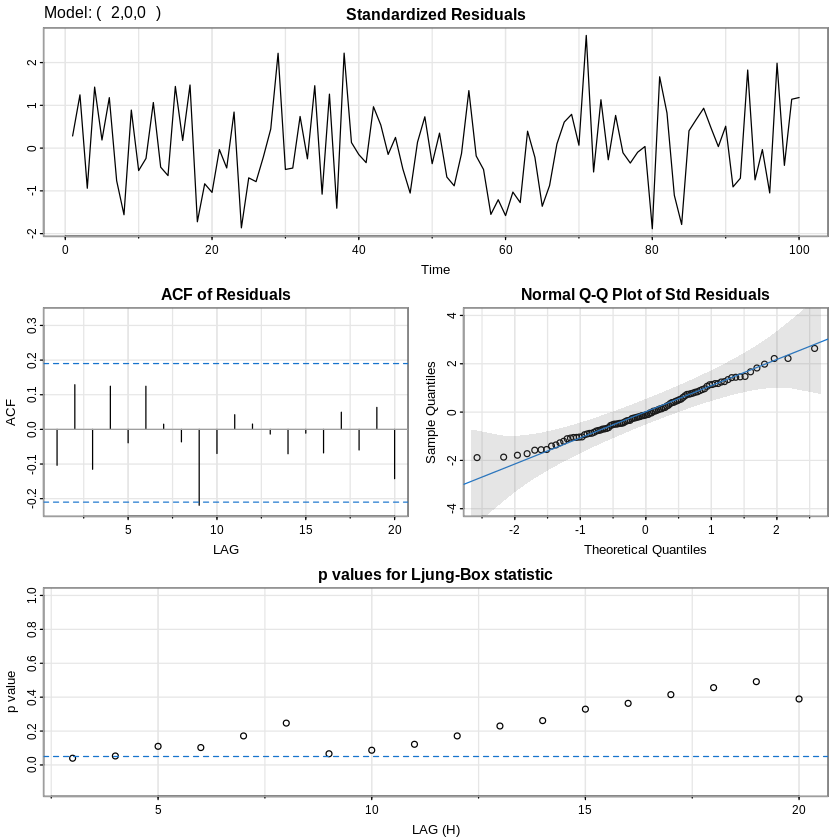

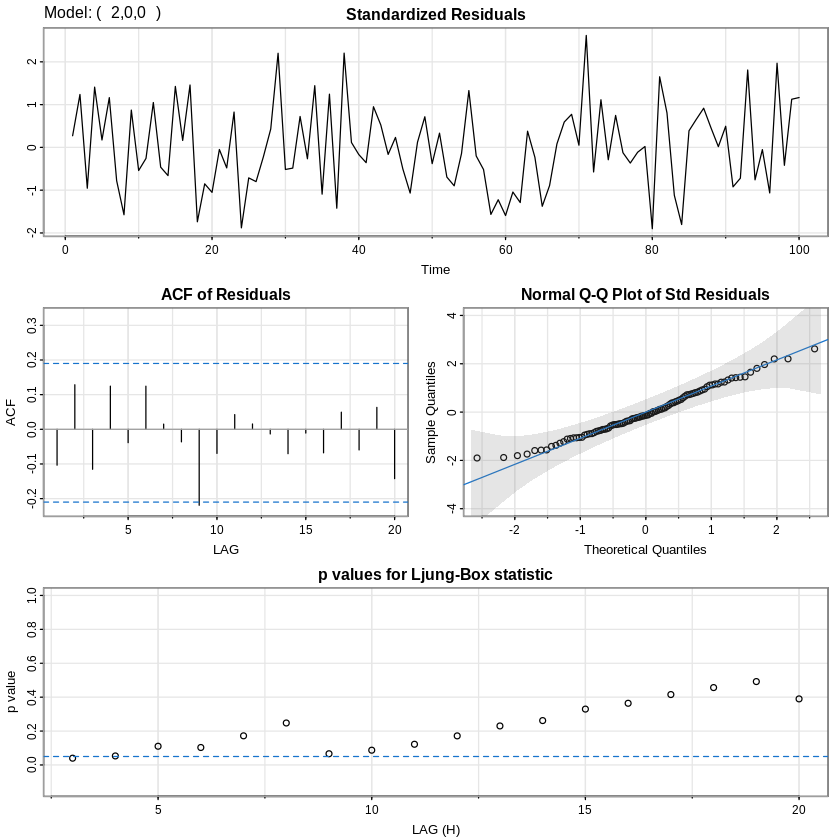

In [38]:
#Part-01
# Simulate AR(2) process
library(astsa)
set.seed(4)
n <- 100
ar2_process <- arima.sim(model = list(ar = c(0.7, -0.6)), n = n, sd = sqrt(1))

# Fit SARIMA models
fit_ar2_with_non_mean_zero <- sarima(ar2_process, p = 2, d = 0, q = 0,
no.constant = FALSE)
estimated_mean <- fit_ar2_with_non_mean_zero$fit$coef["intercept"]
cat("Estimated Mean (from model):", estimated_mean, "\n")
fit_ar2_with_zero_mean <- sarima(ar2_process, p = 2, d = 0, q = 0,
no.constant = TRUE)



**Part-01(Continution): Extract Log-Likelihood and Parameters:**

Extract the log-likelihood and determine the number of parameters (k):

**Non-Zero Mean:**
* k = p + q + 2 = 2 + 0 + 2 = 4 (AR(2), MA(0), variance(1) + mean(1) parameters).

**Zero Mean:**
* k = p + q + 1 = 2 + 0 + 1 = 3 (AR(2), MA(0), and variance(1) parameters).

In [39]:

logLik_with_non_mean_zero <- fit_ar2_with_non_mean_zero$fit$loglik
logLik_with_mean_zero <- fit_ar2_with_zero_mean$fit$loglik
k_with_mean <- 2 + 1 + 1 # AR(2) + mean + variance = 4
k_no_mean <- 2 + 1       # AR(2) + variance = 3


**Part-01 (continution) Compute the AIC manually:**

* **Non-Zero Mean:**

$$
\text{AIC}(\beta) = -2 \cdot \log \left( L \left( \beta, \frac{1}{n} S(\beta) \right) \right) + 2 (p + q + 2)
$$



* **Zero Mean:**

$$
\text{AIC}(\beta) = -2 \cdot \log \left( L \left( \beta, \frac{1}{n} S(\beta) \right) \right) + 2 (p + q + 1)
$$

In [40]:
AIC_with_non_mean_zero <- -2 * logLik_with_non_mean_zero + 2 * k_with_mean
AIC_with_mean_zero <- -2 * logLik_with_mean_zero + 2 * k_no_mean

cat("Manual AIC (with non mean zero):", AIC_with_non_mean_zero/n, "\n")
cat("SARIMA AIC (with non mean zero):", 2.761527, "\n")
 # Sarima won't save the AIC values - inorder to extract I have to use Arima but just to compare the values, I've just entered them here
cat("Manual AIC (with mean zero):", AIC_with_mean_zero/n, "\n")
cat("SARIMA AIC (with mean zero):", 2.741791, "\n")
# Sarima won't save the AIC values - inorder to extract I have to use Arima but just to compare the values, I've just entered them here



Manual AIC (with non mean zero): 2.761527 
SARIMA AIC (with non mean zero): 2.761527 
Manual AIC (with mean zero): 2.741791 
SARIMA AIC (with mean zero): 2.741791 


**Part-02: +5 bonus points if you can do the same for the AICc—this is tougher.**

**AICc Formula:**

* **Non-Zero Mean:**

$$
\text{AICc}(\beta) = -2 \cdot \log \left( L \left( \beta, \frac{1}{n} S(\beta) \right) \right) + 2 (p + q + 2) \cdot \frac{n}{n - p - q - 3}
$$

* where:p + q + 2: Includes AR, MA, variance, and mean parameters.
* n − p − q − 3: Adjusts for the number of effective observations after accounting for parameters.

* **Zero Mean:**

$$
\text{AICc}(\beta) = -2 \cdot \log \left( L \left( \beta, \frac{1}{n} S(\beta) \right) \right) + 2 (p + q + 1) \cdot \frac{n}{n - p - q - 2}
$$

* where:p + q + 1: Includes AR, MA, variance parameters.
* n − p − q − 2: Adjusts for the number of effective observations.


In [41]:
AICc_with_non_mean_zero <- AIC_with_non_mean_zero +
  (2 * k_with_mean * (k_with_mean + 1)) / (n - k_with_mean - 1)
AICc_with_mean_zero <- AIC_with_mean_zero +
  (2 * k_no_mean * (k_no_mean + 1)) / (n - k_no_mean - 1)

cat("Manual AICc (with non mean zero):", AICc_with_non_mean_zero/n, "\n")
cat("SARIMA AICc (with non mean zero):", 2.764027, "\n")
cat("Manual AICc (with mean zero):", AICc_with_mean_zero/n, "\n")
cat("SARIMA AICc (with mean zero):", 2.743028, "\n")


Manual AICc (with non mean zero): 2.765737 
SARIMA AICc (with non mean zero): 2.764027 
Manual AICc (with mean zero): 2.744291 
SARIMA AICc (with mean zero): 2.743028 


**Part-03: (12 points) Discuss whether the AIC and AICc should increase or decrease if you include a mean in your fit. The short answer is: it depends on your dataset. But what exactly does it depend on? Write a short paragraph explaining your answer.**


**Does AIC/AICc Increase or Decrease When Including a Mean? Key Factors:**

**Goodness of Fit:**

* Including a mean improves the model fit (increases logL) if the data has a significant non-zero mean. This is because the model can better capture the data's central tendency.
* For data with a true mean close to zero, including a mean has little impact on logL, as the additional parameter does not significantly improve the fit.

**Model Complexity:**

* Adding a mean increases the total number of parameters (k), which penalizes AIC and AICc. This penalty is stronger for smaller datasets due to the corrective factor in AICc.


**Net Effect on AIC and AICc:**

* AIC/AICc decrease if the improvement in logL outweighs the penalty for the additional parameter.

* AIC/AICc increase if the improvement in logL is small relative to the penalty.

**For this example:**
* The simulated AR(2) data has a true mean of zero.
* Including a mean parameter slightly increases AIC and AICc because the small improvement in logL does not justify the penalty for the additional parameter.
* In practice, the decision to include a mean should also consider domain knowledge. For example, if the process being modeled is known to have a theoretical zero mean, adding a mean may unnecessarily increase model complexity.

**Validation**
* Manual AIC and AICc calculations match the SARIMA outputs, confirming the observations with the exception of AICc small differences are acceptable and can be attributed to numerical rounding or slight difference in how the sarima routine internally calculates values like log-likelihood and correction terms.

**Conclusion:** Including a mean increases AIC and AICc for this dataset due to the penalty for the additional parameter, as the data is simulated with a true mean of zero. For other datasets, the impact depends on the trade-off between the improvement in fit and the complexity penalty.
